### Setup

In [2]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import torch

In [3]:
def show_roc(run, ids):
    for i, id in enumerate(tqdm(ids)):
        output = pd.read_csv(f'../wearsed/training/baseline_conv/output/{run}/test_preds_epoch_{id}.csv')
        y_true, y_pred = output['targets'], output['predictions']
        y_true[y_true == 2] = 1
        fpr, tpr, thr = roc_curve(y_true, y_pred)
        plt.plot(fpr, tpr, label=f'Epoch {id}', color=(i/len(ids), 1-i/len(ids), 1))
    plt.plot([0,1], [0,1], color='green', linestyle='dashed', marker='o')
    plt.xlabel('False Positive Rate (1 - Specifity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc='lower right')
    plt.title(run)
    plt.show()

In [4]:
def show_roc_diffs(runs):
    for run, epoch in tqdm(runs):
        output = pd.read_csv(f'../wearsed/training/baseline_conv/output/{run}/test_preds_epoch_{epoch}.csv')
        y_true, y_pred = output['targets'], output['predictions']
        y_true[y_true == 2] = 1
        fpr, tpr, thr = roc_curve(y_true, y_pred)
        plt.plot(fpr, tpr, label=f'{run} ({epoch})')
    plt.plot([0,1], [0,1], color='green', linestyle='dashed', marker='o')
    plt.xlabel('False Positive Rate (1 - Specifity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc='lower right')
    plt.title(run)
    plt.show()

### Individual Curves

100%|██████████| 10/10 [01:20<00:00,  8.05s/it]


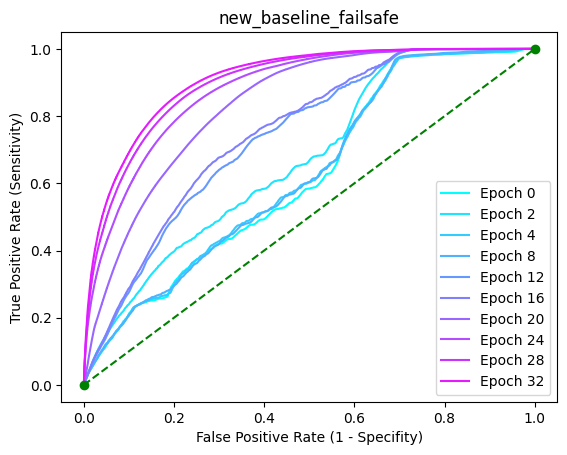

In [4]:
show_roc('new_baseline_failsafe', [0, 2, 4, 8, 12, 16, 20, 24, 28, 32])

100%|██████████| 10/10 [01:27<00:00,  8.71s/it]


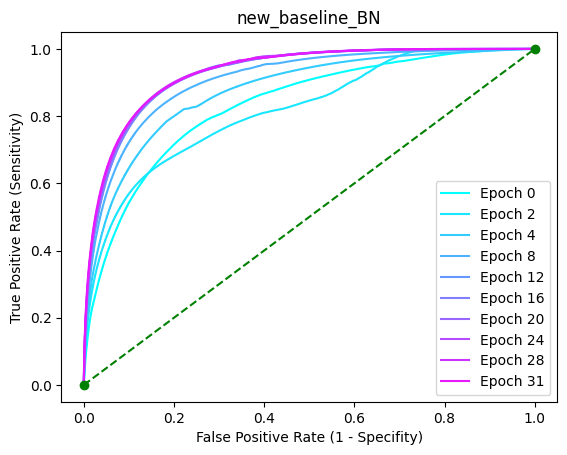

In [5]:
show_roc('new_baseline_BN', [0, 2, 4, 8, 12, 16, 20, 24, 28, 31])

100%|██████████| 33/33 [04:27<00:00,  8.12s/it]


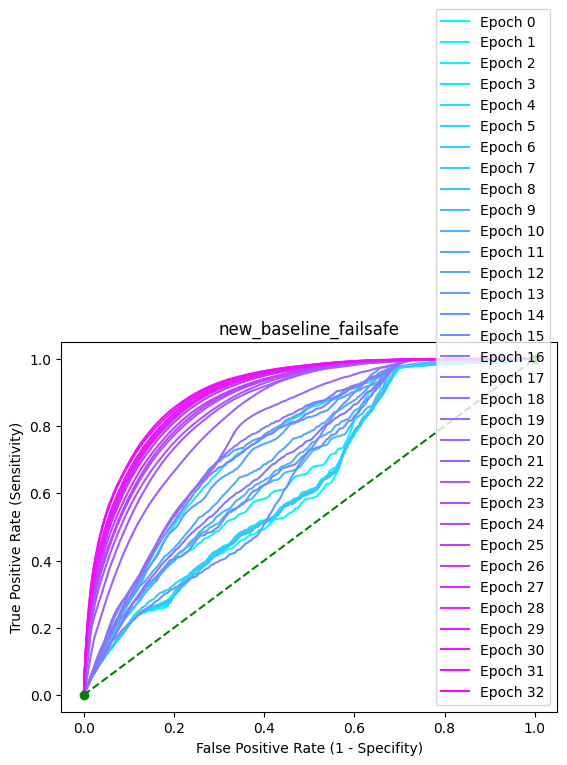

In [6]:
show_roc('new_baseline_failsafe', range(0, 33))

100%|██████████| 10/10 [01:23<00:00,  8.33s/it]


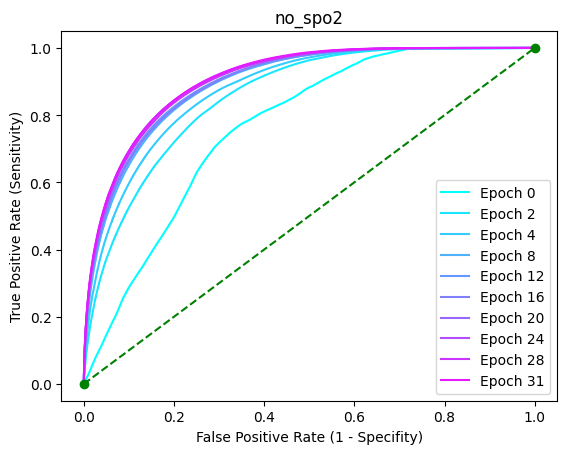

In [4]:
show_roc('no_spo2', [0, 2, 4, 8, 12, 16, 20, 24, 28, 31])

100%|██████████| 7/7 [00:40<00:00,  5.85s/it]


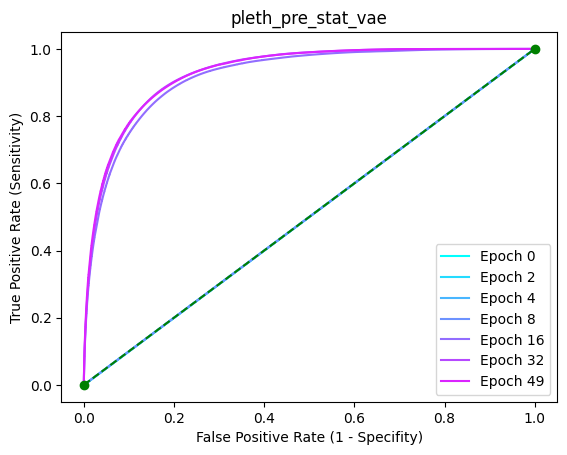

In [8]:
show_roc('pleth_pre_stat_vae', [0, 2, 4, 8, 16, 32, 49])

100%|██████████| 50/50 [07:25<00:00,  8.92s/it]


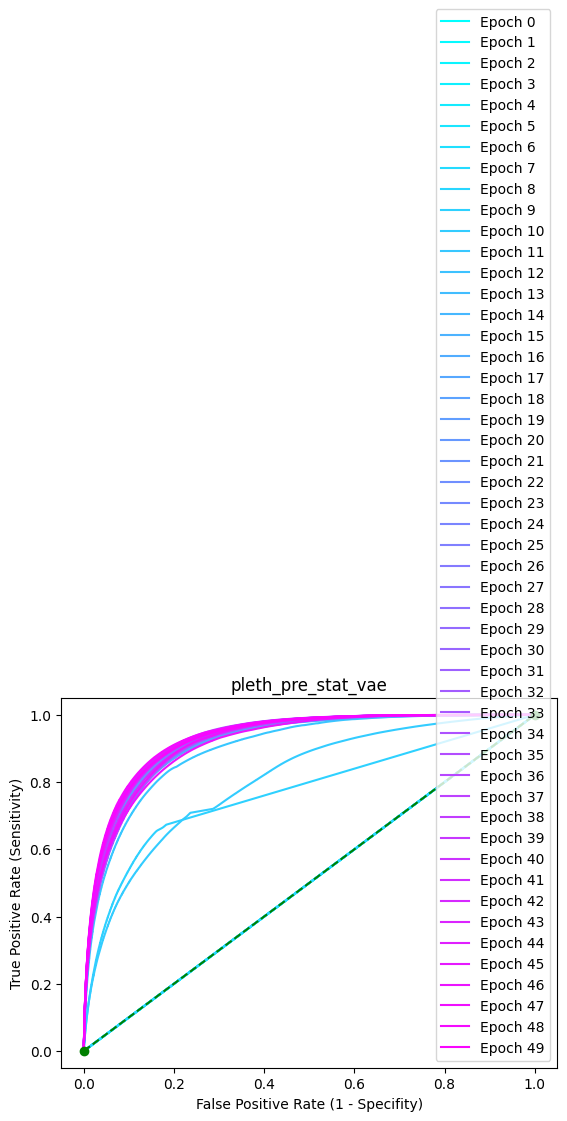

In [9]:
show_roc('pleth_pre_stat_vae', range(50))

100%|██████████| 7/7 [01:58<00:00, 16.88s/it]


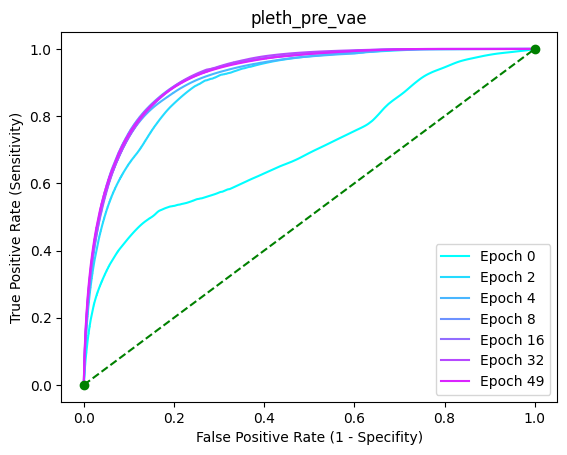

In [10]:
show_roc('pleth_pre_vae', [0, 2, 4, 8, 16, 32, 49])

100%|██████████| 7/7 [02:00<00:00, 17.23s/it]


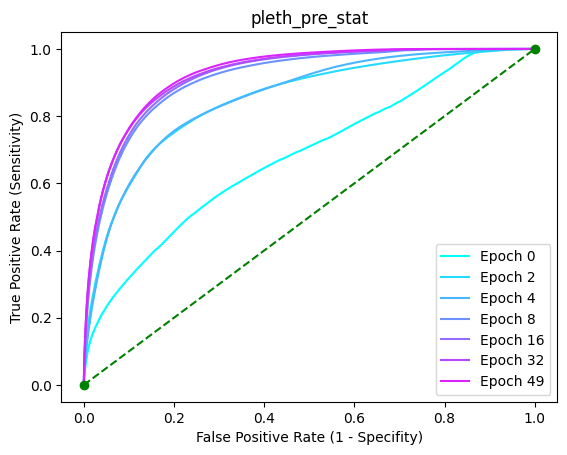

In [11]:
show_roc('pleth_pre_stat', [0, 2, 4, 8, 16, 32, 49])

100%|██████████| 50/50 [07:18<00:00,  8.77s/it]


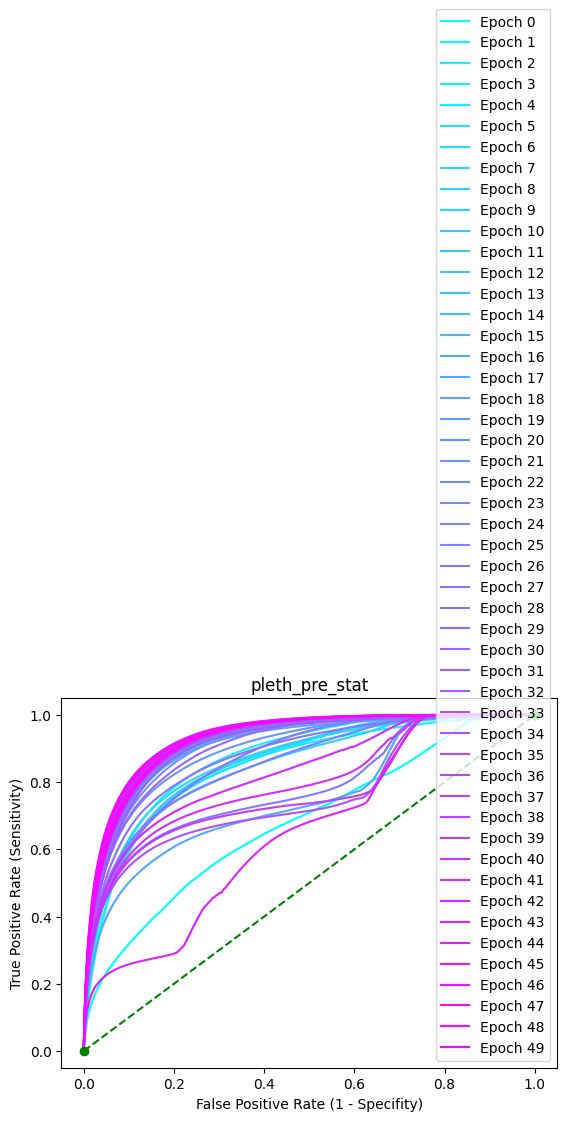

In [5]:
show_roc('pleth_pre_stat', range(50))

### Curve Differences

100%|██████████| 6/6 [01:44<00:00, 17.40s/it]


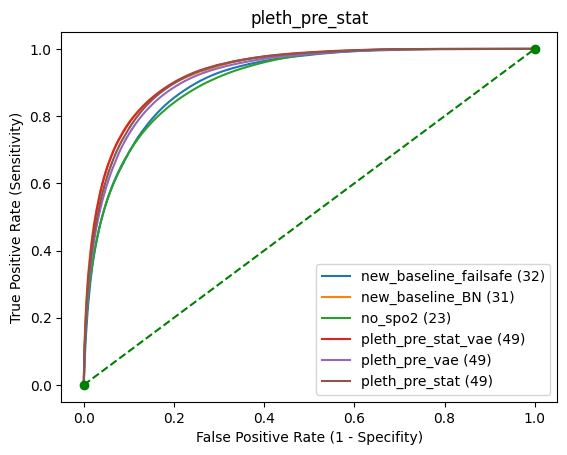

In [12]:
runs = [
    ('new_baseline_failsafe', 32),
    ('new_baseline_BN', 31),
    ('no_spo2', 23),
    ('pleth_pre_stat_vae', 49),
    ('pleth_pre_vae', 49),
    ('pleth_pre_stat', 49),
]
show_roc_diffs(runs)

100%|██████████| 2/2 [00:13<00:00,  6.77s/it]


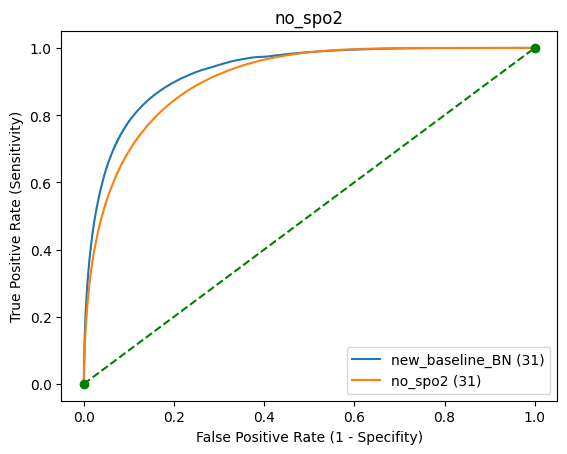

In [6]:
runs = [
    ('new_baseline_BN', 31),
    ('no_spo2', 31),
]
show_roc_diffs(runs)

### How many thresholds

In [20]:
output = pd.read_csv('../wearsed/training/baseline_conv/output/new_baseline_BN/test_preds_epoch_31.csv')
y_true, y_pred = output['targets'], output['predictions']
y_true[y_true == 2] = 1
fpr, tpr, thr = roc_curve(y_true, y_pred)

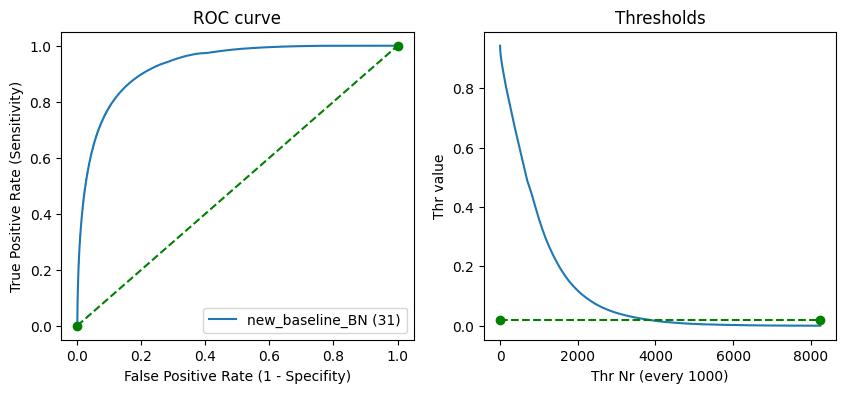

In [43]:
_, (roc_ax, thr_ax) = plt.subplots(1, 2, figsize=(10, 4))
roc_ax.plot(fpr, tpr, label='new_baseline_BN (31)')
roc_ax.plot([0,1], [0,1], color='green', linestyle='dashed', marker='o')
roc_ax.set_xlabel('False Positive Rate (1 - Specifity)')
roc_ax.set_ylabel('True Positive Rate (Sensitivity)')
roc_ax.legend(loc='lower right')
roc_ax.set_title('ROC curve')
thr_ax.plot(range(len(thr[::1000])), thr[::1000])
thr_ax.plot([0,len(thr[::1000])-1], [0.02]*2, color='green', linestyle='dashed', marker='o')
thr_ax.set_xlabel('Thr Nr (every 1000)')
thr_ax.set_ylabel('Thr value')
thr_ax.set_title('Thresholds')
plt.show()

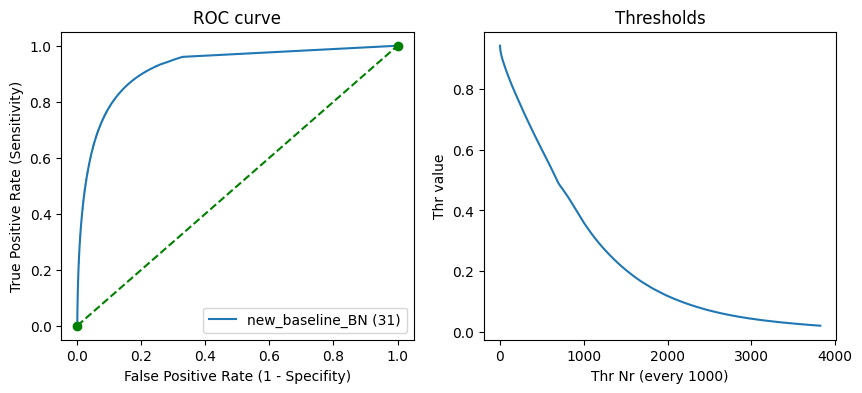

In [44]:
output = pd.read_csv('../wearsed/training/baseline_conv/output/new_baseline_BN/test_preds_epoch_31.csv')
y_true, y_pred = output['targets'], output['predictions']
y_true[y_true == 2] = 1
y_pred[y_pred < 0.02] = 0
fpr, tpr, thr = roc_curve(y_true, y_pred)

_, (roc_ax, thr_ax) = plt.subplots(1, 2, figsize=(10, 4))
roc_ax.plot(fpr, tpr, label='new_baseline_BN (31)')
roc_ax.plot([0,1], [0,1], color='green', linestyle='dashed', marker='o')
roc_ax.set_xlabel('False Positive Rate (1 - Specifity)')
roc_ax.set_ylabel('True Positive Rate (Sensitivity)')
roc_ax.legend(loc='lower right')
roc_ax.set_title('ROC curve')
thr_ax.plot(range(len(thr[::1000])), thr[::1000])
thr_ax.set_xlabel('Thr Nr (every 1000)')
thr_ax.set_ylabel('Thr value')
thr_ax.set_title('Thresholds')
plt.show()